In [1]:
# Import Necessary Modules
import glob
import matplotlib.pyplot as plt 
from skimage import io
import numpy as np
import math
%matplotlib inline 

In [2]:
#This function reads in all images in catsfolder/ and dogsfolder/. 
#Each 64 x 64 image is reshaped into a length-4096 row vector. 
#These row vectors are stacked on top of one another to get two data
#matrices, each with 4096 columns. The first matrix cats consists of all
#the cat images as row vectors and the second matrix dogs consists of all
#the dog images as row vectors.

def read_cats_dogs():
    
    # get image filenames
    cat_locs = glob.glob('catsfolder/*.jpg')
    dog_locs = glob.glob('dogsfolder/*.jpg')
    num_cats = len(cat_locs)
    num_dogs = len(dog_locs)
    
    # initialize empty arrays
    cats = np.zeros((num_cats,64*64))
    dogs = np.zeros((num_dogs,64*64))
              
    #reshape images into row vectors and stack into a matrix 
    for i in range(num_cats):
        img_loc = cat_locs[i]
        img = io.imread(img_loc)
        img = img.T
        img = img.reshape(64*64)
        cats[i,:] = img

    for i in range(num_dogs):
        img_loc = dog_locs[i]
        img = io.imread(img_loc)
        img = img.T
        img = img.reshape(64*64)
        dogs[i,:] = img

    return cats, dogs

In [3]:
#  GAUSSIANCONTOUR(DATA,COLORMAP,GRIDPOINTS,COORDS) displays the contour 
#  plot for a bivariate Gaussian joint PDF with means, variances, and 
#  covariances taken from the sample means, variances, and covariances of
#  the column vectors of DATA, which is assumed to have two columns. 

#  The optional argument COLORMAP determines the colormap of the plot, which
#  may be cm.Reds, cm.Blues, or any other valid matplotlib colormap. cm.Blues is the default.
#  Example: gaussiancontour(data,cm.Reds) plots in red.
#
#  The optional argument GRIDPOINTS determines the number of evaluation
#  points per dimension for the joint PDF. The default is 200. 
#  Example: gaussiancontour(data,cm.Reds,100) uses 100 points per dimension.
#
#  The optional argument COORDS should be a 1 x 4 numpy array [XMIN,XMAX,YMIN,YMAX]
#  that determines the bounding box where the joint PDF is evaluated.
#  This can be helpful to set manually when plotting two or more contours
#  on the same figure, to ensure that they are evaluated over the same grid.
#  Example: gaussiancontour(data,cm.Reds,100,[1 2 -1 5]) evaluates the contour
#  over the box from 1 to 2 on the x-axis and -1 to 5 on the y-axis.

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stat

def gaussiancontour(data,plotcolor=cm.Blues,gridpoints=100,coords=None):
    xmin, ymin = np.amin(data, axis=0)
    xmax, ymax = np.amax(data, axis=0)
    if coords!=None:
        xmin = coords[0]
        xmax = coords[1]
        ymin = coords[2]
        ymax = coords[3]
    
    meanvector = np.mean(data, axis=0)
    covariancematrix = np.cov(data, rowvar=False)
    
    #generate grid points for joint pdf evaluation
    xpoints, ypoints = np.meshgrid(np.linspace(xmin,xmax,num=gridpoints),np.linspace(ymin,ymax,gridpoints));
    grid = np.empty(xpoints.shape + (2,))
    grid[:, :, 0] = xpoints
    grid[:, :, 1] = ypoints
    #evaluate joint Gaussian pdf at grid points
    fXY = stat.multivariate_normal.pdf(grid,meanvector,covariancematrix); 
    plt.contour(xpoints, ypoints, fXY, cmap=plotcolor)

In [4]:
#This function takes in an n x d data matrix X and an index i. Assuming that sqrt(d) is a whole number, it extracts
#the ith row of X and displays it as a grayscale sqrt(d) x sqrt(d) image.

def show_image(X, i):
    #select image
    image = X[i,:]
    d = X.shape[1]
    imdim = math.floor(math.sqrt(d))
    #reshape make into a square
    image = image.reshape((imdim,imdim)).T
    #display the image
    plt.imshow(image,'gray')

### (b)

In [5]:
#This function takes in two datasets (which must have the same number of
#columns), and reduces them down to a two-dimensional representation via
#Principal Component Analysis. It outputs the reduced datasets and
#generates a two-dimensional scatter plot.

def visualize2d(dataset0,dataset1):
    
    X = np.vstack((dataset0,dataset1))
    muX = np.mean(X, axis=0)
    sigmaX = np.cov(X, rowvar=False)
    #Your code goes here.
    eigenValues,eigenVectors = np.linalg.eig(sigmaX)
    argsorted_indices = np.argsort(eigenValues)[::-1]
    i = argsorted_indices[0]
    j = argsorted_indices[1]
    
    Vi = eigenVectors[:, i]
    Vj = eigenVectors[:, j]
    
    V = np.column_stack((Vi, Vj))
    
    dataset0_2d = (dataset0-muX) @ V
    dataset1_2d = (dataset1-muX) @ V
    
    plt.scatter(dataset0_2d[:, 0], dataset0_2d[:, 1], color='blue', s=5, label = 'Dataset 0')
    plt.scatter(dataset1_2d[:, 0], dataset1_2d[:, 1], color='red', s=5, label = 'Dataset 0')
    
    plt.title("PCA")
    
    return dataset0_2d, dataset1_2d

### (a)

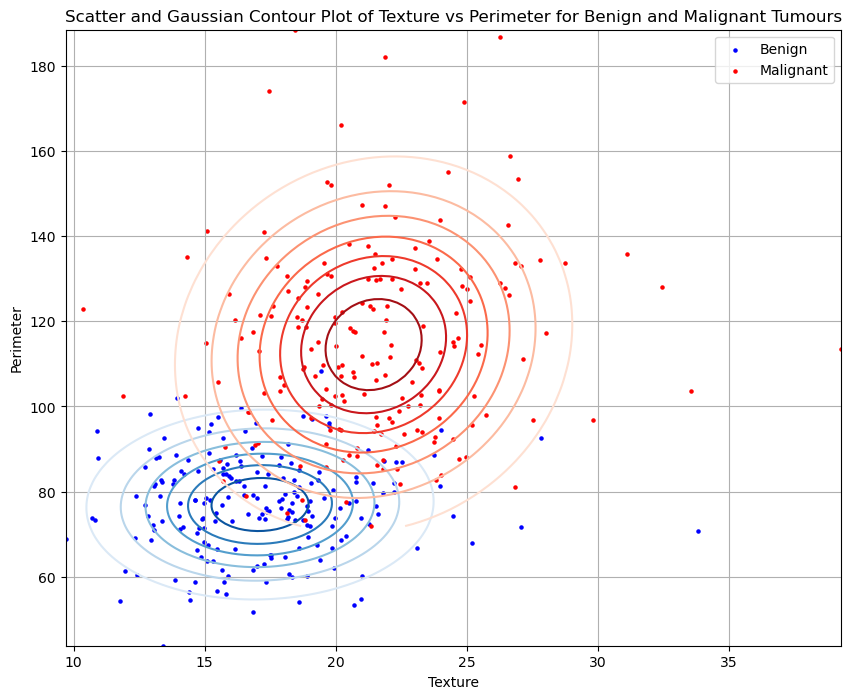

In [6]:
benign = np.genfromtxt("benignfull.csv", delimiter = ",")
malignant = np.genfromtxt("malignantfull.csv", delimiter = ",")

plt.figure(figsize=(10, 8))
ax = plt.gca()

plt.scatter(benign[:,1], benign[:,2], color='blue', s=5, label='Benign')
plt.scatter(malignant[:,1], malignant[:,2], color='red', s=5, label='Malignant')

gaussiancontour(benign[:,1:3], plotcolor=cm.Blues)
gaussiancontour(malignant[:,1:3], plotcolor=cm.Reds)

plt.xlabel('Texture')
plt.ylabel('Perimeter')
plt.title('Scatter and Gaussian Contour Plot of Texture vs Perimeter for Benign and Malignant Tumours')
plt.legend()
plt.grid(True)
plt.show()

### (c)

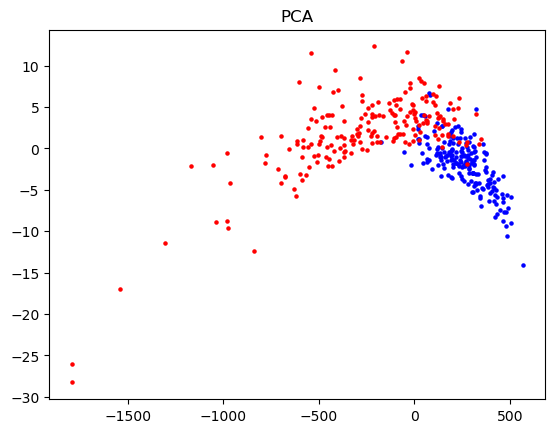

In [7]:
benign2d, malignant2d = visualize2d(benign, malignant)

### (d)

C:\Users\reman\anaconda3\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


(array([[ 1055.62274507+0.j,  -461.99294248+0.j],
        [ 1068.8464535 +0.j,  -528.76563579+0.j],
        [  462.88255379+0.j, -1091.1938762 +0.j],
        ...,
        [  964.24881723+0.j,   752.01073334+0.j],
        [ 1326.97316429+0.j,   910.05464015+0.j],
        [  865.25777372+0.j,   564.56133537+0.j]]),
 array([[ -949.36602148+0.j,  -523.22757605+0.j],
        [ -863.86704548+0.j,   536.97928197+0.j],
        [ -929.66313467+0.j,   514.27173242+0.j],
        ...,
        [-1083.93752037+0.j,  -173.69590206+0.j],
        [ -911.22167918+0.j,   514.01226742+0.j],
        [ -856.38306043+0.j,   432.39720604+0.j]]))

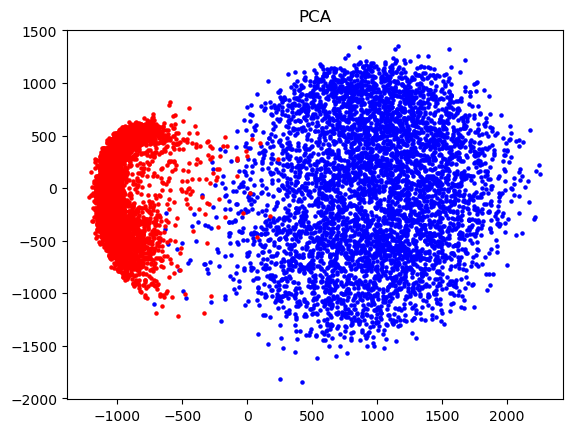

In [8]:
zeros = np.genfromtxt("MNISTzeros.csv", delimiter = ",")
ones = np.genfromtxt("MNISTones.csv", delimiter = ",")

visualize2d(zeros, ones)

The plot generated by the visualize 2d file for the handwriting dataset seems easier to classify than the benign and malignant datasets. There seems to be a critical distinction between zeros and ones that can be seen between zeros and ones.

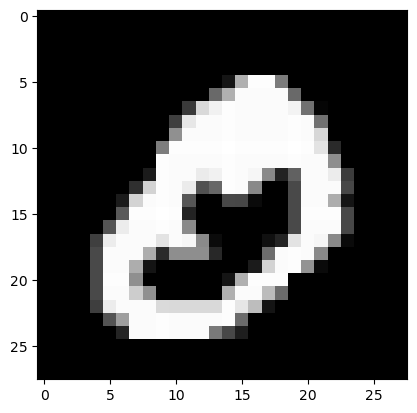

In [9]:
show_image(zeros, 6)

### (e)

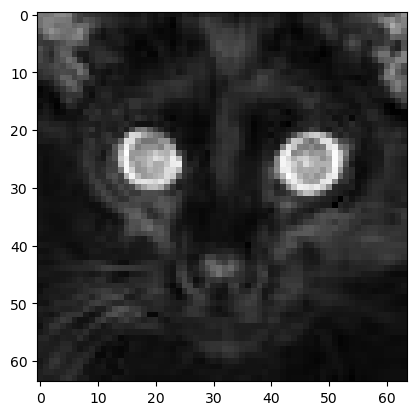

In [10]:
#Show individual cat image. Change the index from 0 to 999 to explore the dataset.
cats, dogs = read_cats_dogs()
show_image(cats,542)

(array([[ -208.13756993+0.j,  1176.18819434+0.j],
        [-2142.98845522+0.j,   494.40698075+0.j],
        [ 3940.69617699+0.j,  1641.30197342+0.j],
        ...,
        [ 2404.84071622+0.j, -1338.90854208+0.j],
        [  178.08951879+0.j,   211.50487529+0.j],
        [ 1159.22501947+0.j,   470.71448332+0.j]]),
 array([[-2569.18689384+0.j,  1909.6581801 +0.j],
        [ -224.64677998+0.j,  1911.50836016+0.j],
        [ -578.83075966+0.j,  -176.95020554+0.j],
        ...,
        [-1494.37467048+0.j,   586.42843006+0.j],
        [-4420.49272641+0.j,  1499.6507411 +0.j],
        [ -652.57727103+0.j, -1364.29970808+0.j]]))

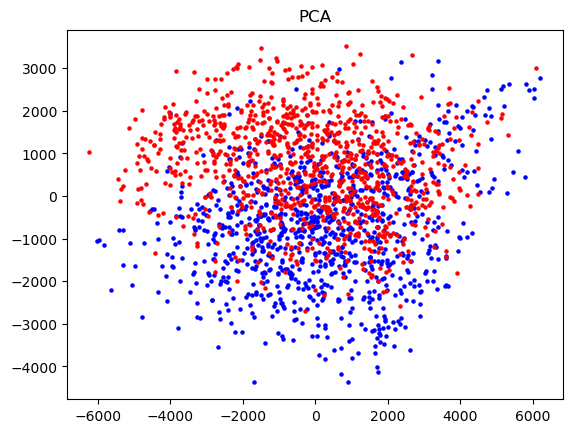

In [11]:
visualize2d(cats,dogs)

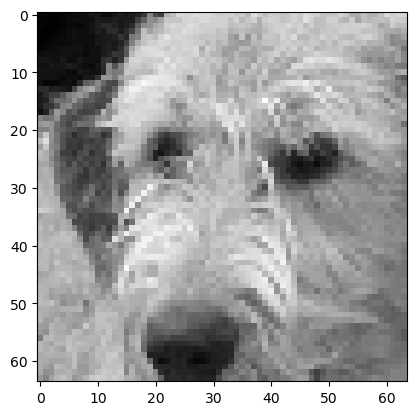

In [12]:
#Show individual dog image. Change the index from 0 to 999 to explore the dataset.
show_image(dogs,123)

Through PCA it seems like the cats and dogs dataset will be the hardest to classify as there are a lot of overlapping points with a seemingly less distinct component that can help distinguish the difference between cats and dogs.